*Version: 28.01.2023*

<a href="https://www.w-hs.de/service/informationen-zur-person/person/nalbach/">
    <img src="https://www.w-hs.de/typo3conf/ext/whs/Resources/Public/Images/Pagelayout/w-hs_pagelogo.png"       alt="drawing" width="200" align="right"/>
</a>

<h1 align="center">  </h1>
<h1 align="center"> Maschine Learning 1 WS 22/23 </h1>
<h4 align="center"> Lennart Fuhrig </h4>


# Task
> *Aufgabenstellung* hier in ein oder zwei Sätzen beschreiben
> * #### Data Preprocessing
> * #### Random Forest Base Classifier
> * #### Bagging Ensemble Class
> * #### Evaluation

<a href="https://github.com/lennart2810/ML1">
    <img src="https://raw.githubusercontent.com/lennart2810/ML1/master/appendix/bagging.png"       alt="drawing" width="700" align="center"/>
</a>

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
# enables the import of functions from other notebooks
#!pip install ipynb 

# import ensemble class and functions defined in separate script
from ipynb.fs.full.header_file import get_processed_data, MyEnsembleClassifier, plot_MRF

# Preprocessing

> #### `get_processed_data`
> uses three nested functions for laoding, preprocessing and splitting a dataset to prepare it for use in an ensemble machine learning model. It takes two optional arguments: the `debug` boolean indicates whether to print information during the process or not, whereas the `proportion` input is passed to the `split_train_data` function.
>> #### `load_dataset`
>> loads the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) using `keras.datasets`. It returns the train and test data, including images and labels, as well as a dictionary that maps the numeric labels of the classes to their names.
>> #### `process_data`
>> performs several preprocessing steps on the dataset. It converts the images to grayscale, scales them from 0-255 to 0-1 and flattens the image data as well as the labels.
<a href="https://github.com/lennart2810/ML1">
    <img src="https://raw.githubusercontent.com/lennart2810/ML1/master/appendix/bagging.png"       alt="drawing" width="200" align="center"/>
</a>
>> #### `split_train_data`
>> splits the train data into two parts: an *unique* and an *overlapping* set. The `proportion` input is a value between 0 and 1 indicating the proportion of the data to be used as the *overlap* subset.
> #### example:
>```python
>train, unique, overlap, test, class_dict = get_processed_data(debug=True, proportion=0.2)
>```
A proportion of 20% of the `train` data will be used as the `overlap` subset, remainig samples are stored in the `unique` one. All data outputs are defined as a `list`, each containing a numpy array for the images `(N, 1024)` and labels `(N, )`.

> For **documentation / code** use: `get_processed_data?` / `get_processed_data??`


In [4]:
# call preprocessing function
train_data, unique_data, overlap_data, test_data, class_dict = get_processed_data(proportion=0.2, debug=True)

1. load CIFAR-10 dataset:

train:	(50000, 32, 32, 3), (50000, 1)
test:	(10000, 32, 32, 3), (10000, 1)

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

2. preprocess dataset:

train:	(50000, 1024), (50000,)
test:	(10000, 1024), (10000, 1024)

3. prepare train data for ensemble:

unique:	(40000, 1024), (40000,)
overlap:(10000, 1024), (10000,)


In [5]:
# print exemplary information for the training data
print(f'train data:\t{len(train_data)}\t\t{type(train_data)}')
print(f'train images:\t{train_data[0].shape}\t{type(train_data[0])}')
print(f'train labels:\t{train_data[1].shape}\t{type(train_data[1])}')

train data:	2		<class 'list'>
train images:	(50000, 1024)	<class 'numpy.ndarray'>
train labels:	(50000,)	<class 'numpy.ndarray'>


<br>

# Step 1: Random Forest Base Classifier

> The following example code uses [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated) to find the best hyperparameters for a [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) by training and evaluating the `grid_search` object with all possible combinations specified in the `param_grid`. The best set can be extracted to define the **RF Base Classifier**.

```python
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [None, 5, 10], 
              'n_estimators': [50, 100, 150],
              'min_samples_leaf': [1, 2, 5, 10], 
              'max_features': ["sqrt", "log2", None]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(train_images, train_labels)
```

In [6]:
# define random forest base classifier with parameters determined by GridSearchCV
def rf_base_clf():
    return RandomForestClassifier(n_estimators=100, 
                                  min_samples_leaf=2, 
                                  max_features=None, 
                                  max_depth=None, 
                                  verbose=0)

<br>

# Step 2: Create and Train Bagging Ensemble

### `EnsembleClassifier`

> #### `init`
> * test
> * weiterer test

> #### `create_subsets`
> * test
> * weiterer test

> #### `train`
> * test
> * weiterer test

> #### `evaluate`
>> #### `get_accuracy`
>> * test

>> #### `get_predictions`
>> * test

This code defines a class called "EnsembleClassifier" that creates an ensemble of classifiers using bagging. The class takes a base classifier, the number of classifiers to create in the ensemble (n_classifier), and a dictionary of classes (class_dict) as inputs.

The class has several methods:

    init: Initializes the class by creating a list of the specified number of base classifiers and storing the class_dict and class_labels as class attributes.
    create_subsets: This method takes two data sets (unique and overlap) and an overlap_dict as inputs, and creates subsets of the data for each ensemble member to train on. It uses a combination of sequential sampling from the unique data set and random sampling from the overlapping data set to create these subsets.
    train: This method trains each ensemble member on the subset of data created in the create_subsets method. An optional proportion parameter can be passed in to reduce the size of the data set and speed up training during development.
    get_accuracy_score: This method takes images and labels as inputs and calculates the accuracy of each ensemble member on that data.

The goal of the code is to create and train an ensemble of classifiers using bagging and to get the confidence of the ensemble on its predictions.


Certainly, here are the additional methods that I missed:

    evaluate: This method takes images and labels as inputs, and evaluates the ensemble's performance on those images by getting predictions from each ensemble member and returning the accuracy score.
    analyse_predictions: This method takes images and labels as inputs, and analyses the ensemble's predictions by getting predictions from each ensemble member, then returning the mean and standard deviation of the predicted class probabilities for each image.

The evaluate method uses the get_accuracy_score method to get the accuracy of each ensemble member on the input data, and then return the accuracy score of the ensemble as a whole. The analyse_predictions method uses the predict_proba method to get the class probabilities predicted by each ensemble member, then it returns the mean and standard deviation of the predicted class probabilities for each image. This will give us some idea about the confidence of the ensemble on its predictions, by seeing how close the predictions of the different members are.


In der fit Methode trainieren Sie mehrere Instanzen der Basisklasse (z.B. RandomForestClassifier) auf unterschiedlichen Teilmengen der Trainingsdaten und speichern Sie die trainierten Modelle.
In der predict Methode rufen Sie die predict Methode für jedes trainierte Modell auf und berechnen die relative Häufigkeit der Vorhersagen. Die Klasse mit der höchsten relative Häufigkeit wird als Vorhersage für die Eingabe zurückgegeben.


Documentation for MyEnsembleClassifier:

MyEnsembleClassifier is an ensemble classifier that uses bagging to train multiple base classifiers on different subsets of the data. The classifier is initialized with a base classifier, the number of classifiers to be trained, and a dictionary containing class labels.
Initialization

The class takes three input arguments:

    base_classifier: a function that returns a base classifier object. This classifier will be used to train multiple classifiers in the ensemble.

    n_classifier: an integer representing the number of classifiers to be trained.

    class_dict: a dictionary containing class labels.

Upon initialization, the class creates a list of n_classifier base classifiers using list comprehension and a function call to base_classifier(). The class also stores the class_dict and class_y (list of class labels) as class attributes.
create_subsets()

This method creates subsets of the data that will be used to train the classifiers in the ensemble. The method takes three input arguments:

    unique: a tuple containing the unique images and labels of the dataset.

    overlap: a tuple containing the images and labels of the dataset that overlap with the unique dataset.

    overlap_dict: a dictionary containing the number of samples to be taken from the overlap dataset for each classifier.

The method first extracts the images and labels from the unique and overlap datasets. Then, it creates a subset for each classifier by slicing the unique dataset and appending a random sample from the overlap dataset. The subsets are stored as a class attribute.
train()

This method trains each classifier on their corresponding subset. The method takes one optional input argument, proportion, which is used to reduce the size of the dataset during development to reduce training time. The method prints the training progress of each classifier and the total training duration in seconds.
get_accuracy_score()

This method calculates the accuracy score for each classifier and the ensemble. The method takes two input arguments:

    images: a numpy array containing the images to be evaluated.

    labels: a numpy array containing the labels of the images.

The method first calculates the accuracy score for each classifier using the score() method and stores the scores in a list. The method then calculates the mean of the scores to get the ensemble accuracy score. The ensemble accuracy score is stored as a class attribute.

Note: The code snippet provided is not a complete class definition and may contain errors. It is recommended to test the class with sample data before using it in a production environment.

In [7]:
# define number of ensemble members
n_clf = 40

# predefined number of samples for the overlapping subsets (number of samples = f(number of classifier))
overlap_dict = {10:6000, 20:5000, 40:3000} 

In [8]:
# initialize the ensemble
ensemble = MyEnsembleClassifier(rf_base_clf, n_clf, class_dict)

initialized ensemble with 40 RandomForestClassifier(max_features=None, min_samples_leaf=2)


In [9]:
# call method to create subsets
ensemble.create_subsets(unique_data, overlap_data, overlap_dict)

created 40 subsets, each containing the following:

images:	(4000, 1024)
labels:	(4000,)


In [10]:
# train ensemble
ensemble.train(1) # train each classifier on 100% of their corresponding subset (default = 1 for full training)

train each classifier on their corresponding subset:

1. classifier
2. classifier
3. classifier
4. classifier
5. classifier
6. classifier
7. classifier
8. classifier
9. classifier
10. classifier
11. classifier
12. classifier
13. classifier
14. classifier
15. classifier
16. classifier
17. classifier
18. classifier
19. classifier
20. classifier
21. classifier
22. classifier
23. classifier
24. classifier
25. classifier
26. classifier
27. classifier
28. classifier
29. classifier
30. classifier
31. classifier
32. classifier
33. classifier
34. classifier
35. classifier
36. classifier
37. classifier
38. classifier
39. classifier
40. classifier

training duration: 5731.36 s


<br>

# Step 3: Evaluate Ensemble

### hier evaluation und ensemble.evaluate detallierter beschreiben, wie der plot funktioniert irrelevant

This code defines two functions: interpolate_data and plot_results.

The interpolate_data function takes two inputs, x and y. It uses the make_interp_spline function from the scipy library to fit a cubic spline to the data points (x, y), and generate a new set of data points with 300 points, where x_new are the new x-coordinates and y_new are the corresponding y-coordinates of the spline. This function returns a list containing x_new and y_new.

The plot_results function takes four inputs, data, p_range, title, and relative. data is a list of lists, and each sublist contains 3 values, M, R, and F. p_range is the range of x-coordinates that the data points are plotted along, title is the title of the plot. relative is a boolean indicating whether the values in data are relative or absolute.

The function first checks the relative parameter, if it's true it sets the value of M, R, and F by multiplying the values in data by M. Else, the values of M, R, and F are set as the values in data. Then, the function applies the interpolate_data function to the data points for M, R, and F, and assigns the returned values to M_x, M_y, R_x, R_y, F_x, and F_y respectively.
Then, the function plots the data points using matplotlib, with options to adjust the style of the plot, and it also sets the title and the labels of the plot. It saves the plot as an image in the results folder, and displays the plot.

The goal of this code is to plot the results of some calculations, it interpolates the data points to make the plot smooth, and adjust the plot style, saves the plot as an image, and display it.

In [11]:
# only for develop to reduce evaluation time

develop = False

if develop:

    samples = 200
    test_data[0] = test_data[0][:samples]
    test_data[1] = test_data[1][:samples]

    train_data[0] = train_data[0][:samples]
    train_data[1] = train_data[1][:samples]

In [12]:
def evaluation(labels, ensemble_pred, ensemble_pred_confi, treshold):

    N, M, R, F = len(labels), 0, 0, 0

    # iterate over all images 
    for label, pred, o_max in zip(labels, ensemble_pred, ensemble_pred_confi):    

        # is the ensemble prediction subject to uncertainty? 
        if o_max < treshold: 
            M += 1

            # is the uncertain prediction right or wrong?
            if pred == label: R += 1
            else: F += 1
                
    if M != 0:
        # relativize values to N (number of images) (R, F already relative to M)
        M = M / N
        R = R / N
        F = F / N 
            
    return [M, R, F, treshold]

In [13]:
# create horizontal axis
treshold_range = (np.round(np.arange(0, 1.1, 0.1), 2)) 

def main(data, data_name):
    
    # extract images and labels from given data set
    images, labels = data[0], data[1]
    
    # evaluate ensemble on given dataset
    acc, pred, relative_pred, ensemble_pred, ensemble_pred_confi = ensemble.evaluate(images, labels)
    
    # print ensemble evaluation info
    print(f'accuracy:\t\t{round(acc, 3)}\t\t{type(acc)}')
    print(f'predictions:\t\t{pred.shape}\t{type(pred)}')
    print(f'relative predictions:\t{relative_pred.shape}\t{type(relative_pred)}')
    print(f'ensemble prediction:\t{ensemble_pred.shape}\t{type(ensemble_pred)}')
    print(f'ensemble confidence:\t{ensemble_pred_confi.shape}\t{type(ensemble_pred_confi)}')

    # evaluation for given thresholds
    results = [evaluation(labels, ensemble_pred, ensemble_pred_confi, treshold) for treshold in treshold_range]
    
    # plot results via plotting function 
    title = f'{ensemble.clf_n} classifier on {data_name} dataset (accuracy: {round(acc * 100, 3)}%)'
    plot_MRF(results, title)

accuracy:		0.337		<class 'numpy.float64'>
predictions:		(10000, 40)	<class 'numpy.ndarray'>
relative predictions:	(10000, 10)	<class 'numpy.ndarray'>
ensemble prediction:	(10000,)	<class 'numpy.ndarray'>
ensemble confidence:	(10000,)	<class 'numpy.ndarray'>


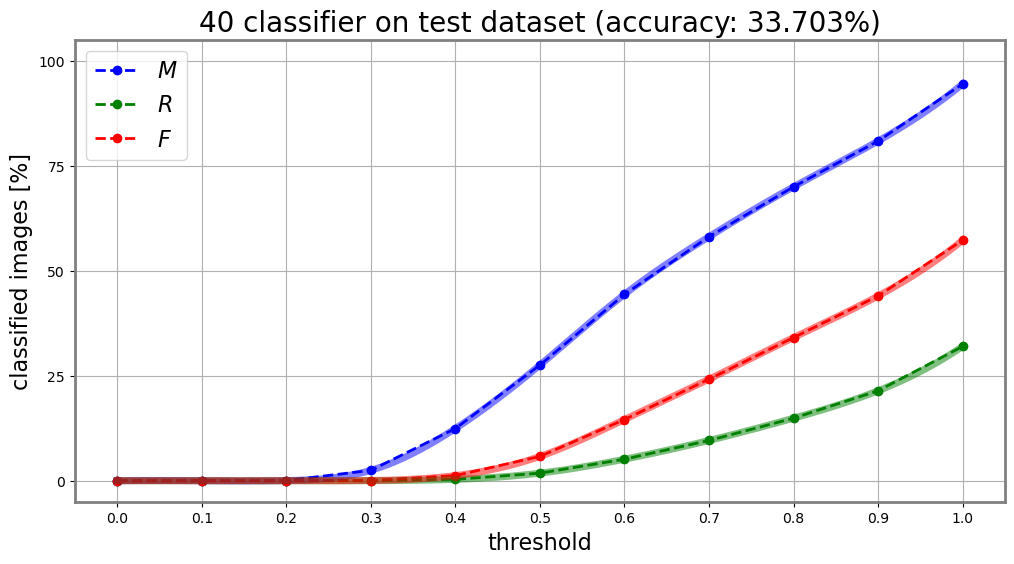

In [14]:
# evaluate test dataset
main(test_data, 'test')

accuracy:		0.382		<class 'numpy.float64'>
predictions:		(50000, 40)	<class 'numpy.ndarray'>
relative predictions:	(50000, 10)	<class 'numpy.ndarray'>
ensemble prediction:	(50000,)	<class 'numpy.ndarray'>
ensemble confidence:	(50000,)	<class 'numpy.ndarray'>


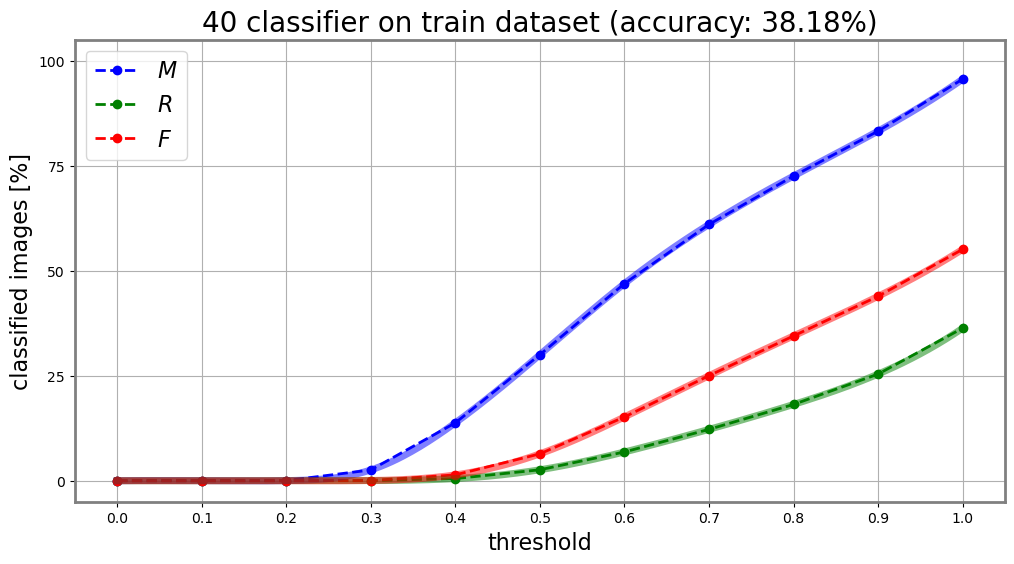

In [15]:
# evaluate train dataset
main(train_data, 'train')